In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from matplotlib.patches import Patch

/panfs/ccds02/nobackup/people/almullen/.conda/envs/smallsat/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
mm = 1/25.4

In [5]:
csvs = []

for file in os.listdir('data/'):
    if file.endswith('IOUs.parquet'):
        aoi = file.split('_')[0]
        csv = pd.read_parquet(os.path.join('data', file))
        csv['AOI'] = [aoi]*len(csv)
        csvs.append(csv)
        
csvs=pd.concat(csvs)
csvs=csvs.reset_index(drop=True)

In [6]:
##computing the bin properties (same for both distributions)
num_bin = 50
bin_lims = np.logspace(-5,2,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

In [7]:
##computing the histograms
boreal_csvs = csvs[csvs['AOI']!='ykd']
boreal_hist_planet, _ = np.histogram(boreal_csvs['area_km'].astype(np.float64), bins=bin_lims)
boreal_hist_missed_s2, _ = np.histogram(boreal_csvs[boreal_csvs['s2_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)
boreal_hist_missed_jrc, _ = np.histogram(boreal_csvs[boreal_csvs['jrc_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)
boreal_hist_missed_mod, _ = np.histogram(boreal_csvs[boreal_csvs['mod_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)

boreal_hist_missed_s2_norm = boreal_hist_missed_s2/boreal_hist_planet
boreal_hist_missed_jrc_norm = boreal_hist_missed_jrc/boreal_hist_planet
boreal_hist_missed_mod_norm = boreal_hist_missed_mod/boreal_hist_planet

/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/855726956.py:8: RuntimeWarning: invalid value encountered in true_divide
  boreal_hist_missed_s2_norm = boreal_hist_missed_s2/boreal_hist_planet
/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/855726956.py:9: RuntimeWarning: invalid value encountered in true_divide
  boreal_hist_missed_jrc_norm = boreal_hist_missed_jrc/boreal_hist_planet
/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/855726956.py:10: RuntimeWarning: invalid value encountered in true_divide
  boreal_hist_missed_mod_norm = boreal_hist_missed_mod/boreal_hist_planet


In [8]:
##computing the histograms
ykd_csvs = csvs[csvs['AOI']=='ykd']
ykd_hist_planet, _ = np.histogram(ykd_csvs['area_km'].astype(np.float64), bins=bin_lims)
ykd_hist_missed_s2, _ = np.histogram(ykd_csvs[ykd_csvs['s2_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)
ykd_hist_missed_jrc, _ = np.histogram(ykd_csvs[ykd_csvs['jrc_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)
ykd_hist_missed_mod, _ = np.histogram(ykd_csvs[ykd_csvs['mod_IOU']==0]['area_km'].astype(np.float64), bins=bin_lims)

ykd_hist_missed_s2_norm = ykd_hist_missed_s2/ykd_hist_planet
ykd_hist_missed_jrc_norm = ykd_hist_missed_jrc/ykd_hist_planet
ykd_hist_missed_mod_norm = ykd_hist_missed_mod/ykd_hist_planet

/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/4003403991.py:8: RuntimeWarning: invalid value encountered in true_divide
  ykd_hist_missed_s2_norm = ykd_hist_missed_s2/ykd_hist_planet
/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/4003403991.py:9: RuntimeWarning: invalid value encountered in true_divide
  ykd_hist_missed_jrc_norm = ykd_hist_missed_jrc/ykd_hist_planet
/explore/nobackup/people/almullen/.nccstmp/ipykernel_490588/4003403991.py:10: RuntimeWarning: invalid value encountered in true_divide
  ykd_hist_missed_mod_norm = ykd_hist_missed_mod/ykd_hist_planet


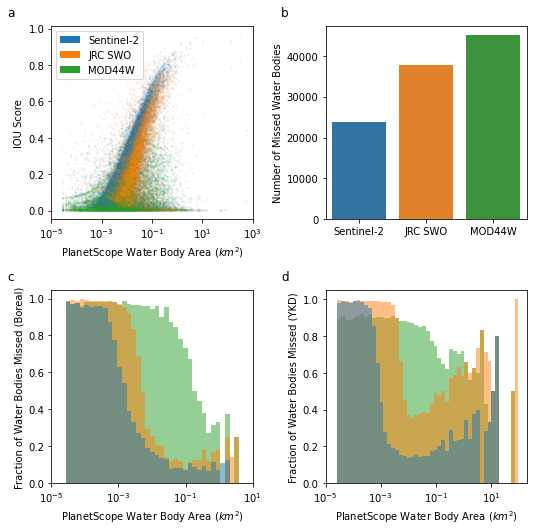

In [9]:
fig, axes = plt.subplots(2,2, figsize = (190*mm, 190*mm))

palette = sns.color_palette()

axes[0][0].set(xscale='log')
#sns.kdeplot(data = csvs_filtered, x = 'area_km', y='s2_IOU', palette='Blues', fill=True)
#sns.kdeplot(data = csvs[csvs['s2_IOU']!=0], x = 'area_km', y='s2_IOU', ax=ax, fill=True)
#sns.kdeplot(data = csvs[csvs['jrc_IOU']!=0], x = 'area_km', y='jrc_IOU', ax=ax, fill=True)
#sns.kdeplot(data = csvs[csvs['mod_IOU']!=0], x = 'area_km', y='mod_IOU', ax=ax, fill=True)


sns.scatterplot(data = csvs[csvs['s2_IOU']!=0], x = 'area_km', y='s2_IOU', alpha=0.1, s=5, edgecolor='None', label = 'Sentinel-2', ax=axes[0][0], color = palette[0])
sns.scatterplot(data = csvs[csvs['jrc_IOU']!=0], x = 'area_km', y='jrc_IOU', alpha=0.1, s=5, edgecolor='None', label = 'JRC SWO', ax=axes[0][0], color = palette[1])
sns.scatterplot(data = csvs[csvs['mod_IOU']!=0], x = 'area_km', y='mod_IOU', alpha=0.1, s=5, edgecolor='None', label = 'MOD44W', ax=axes[0][0], color = palette[2])

sns.barplot(x=['Sentinel-2', 'JRC SWO', 'MOD44W'], y=[len(csvs[csvs['s2_IOU']==0]), len(csvs[csvs['jrc_IOU']==0]), len(csvs[csvs['mod_IOU']==0])], ax=axes[0][1])

axes[1][0].set(xscale='log')
axes[1][0].bar(bin_centers, boreal_hist_missed_mod_norm, width = bin_widths, align = 'center', alpha = 0.5, color = palette[2])
axes[1][0].bar(bin_centers, boreal_hist_missed_jrc_norm, width = bin_widths, align = 'center', alpha = 0.5, color = palette[1])
axes[1][0].bar(bin_centers, boreal_hist_missed_s2_norm, width = bin_widths, align = 'center', alpha = 0.5, color = palette[0])

axes[1][1].set(xscale='log')
axes[1][1].bar(bin_centers, ykd_hist_missed_mod_norm, width = bin_widths, align = 'center', alpha=0.5, color = palette[2])
axes[1][1].bar(bin_centers, ykd_hist_missed_jrc_norm, width = bin_widths, align = 'center', alpha=0.5, color = palette[1])
axes[1][1].bar(bin_centers, ykd_hist_missed_s2_norm, width = bin_widths, align = 'center', alpha=0.5, color = palette[0])


axes[0][0].set_ylabel('IOU Score', fontsize=10)
axes[0][1].set_ylabel('Number of Missed Water Bodies', fontsize=10)
axes[1][0].set_ylabel('Fraction of Water Bodies Missed (Boreal)', fontsize=10)
axes[1][1].set_ylabel('Fraction of Water Bodies Missed (YKD)', fontsize=10)

axes[0][0].set_xlabel('PlanetScope Water Body Area ($km^2$)', fontsize=10)
axes[1][0].set_xlabel('PlanetScope Water Body Area ($km^2$)', fontsize=10)
axes[1][1].set_xlabel('PlanetScope Water Body Area ($km^2$)', fontsize=10)


axes[0][0].set_xlim(0.00001, 1000)
axes[1][0].set_xlim(0.00001, 10)
axes[1][1].set_xlim(0.00001, 200)

axes[0][0].text(-0.22, 1.05, 'a', transform=axes[0][0].transAxes, fontsize = 12)
axes[0][1].text(-0.22, 1.05, 'b', transform=axes[0][1].transAxes, fontsize = 12)
axes[1][0].text(-0.22, 1.05, 'c', transform=axes[1][0].transAxes, fontsize = 12)
axes[1][1].text(-0.22, 1.05, 'd', transform=axes[1][1].transAxes, fontsize = 12)

axes[0][0].legend(handles = [Patch(facecolor=palette[0], edgecolor='None', label='Sentinel-2'),
                            Patch(facecolor=palette[1], edgecolor='None', label='JRC SWO'),
                            Patch(facecolor=palette[2], edgecolor='None', label='MOD44W')])

plt.tight_layout()


plt.savefig('output/product_ious.jpg', dpi=300, bbox_inches='tight')
plt.show()